In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from random import *

In [2]:
def initInfluencers():
    influencers = []
    with open('influencers.csv') as dataCsv:
        readCSV = csv.reader(dataCsv, delimiter=',')
        next(readCSV)
        for row in readCSV:
            data = {'id' : row[0], 'followers' : row[1], 'engagement' : row[2], 'fuzziness' : 0}
            influencers.append(data)
    return influencers

In [3]:
def fuzzification(influencers):
    membership = []
    
    #followers    
    few = range(0, 30001)
    downFew = range(30001, 40001)
    upMed = range(30001, 40001)
    medium = range(40001, 70001)
    downMed = range(70001, 80001)
    upMany = range(70001, 80001)
    many = range(80001, 100001)

    #Engagement
    poor = [0.0, 2.00]
    downPoor = [2.01, 3.50]
    avg = [4.51, 7.00]
    upAvg = [2.71, 4.50]
    downAvg = [7.01, 8.51]
    good = [8.51, 10.00]
    upGood = [7.01, 8.51]
    
    for i in range(len(influencers)):
        fewVal = 0
        medVal = 0
        manyVal = 0
        poorVal = 0
        avgVal = 0
        goodVal = 0
        
        folls = int(influencers[i]["followers"])
        engg = float(influencers[i]["engagement"])
        
        if folls <= max(few) :
            fewVal = 1
        elif folls >= min(medium) and folls <= max(medium):
            medVal = 1
        elif folls >= min(many) and folls <= max(many):
            manyVal = 1
        elif folls >= min(downFew) and folls <= max(upMed):
            medVal = (folls - min(upMed)) / (max(downFew) - min(upMed))
            fewVal = (max(downFew) - folls) / (max(downFew) - max(few))
            manyVal = 0
        elif folls >= min(downMed) and folls <= max(upMany):
            manyVal = (folls - min(upMany)) / (max(downMed) - min(upMany))
            medVal = (max(downMed) - folls) / (max(downMed) - min(downMed))
        
        if engg <= max(poor):
            poorVal = 1
        elif engg >= min(avg) and engg <= max(avg):
            avgVal = 1
        elif engg >= min(good) and engg <= max(good):
            goodVal = 1
        elif engg >= min(downPoor) and engg <= max(upAvg):
            poorVal = (max(downPoor) - engg)  / (max(downPoor) - max(poor))
            avgVal = (engg - min(upAvg)) / (max(downPoor) - min(upAvg))
        elif engg >= min(downAvg) and engg <= max(upGood):
            avgVal = (max(downAvg) - engg) / (max(downAvg) - min(downAvg))
            goodVal = (engg - min(upGood)) / (max(downAvg) - min(upGood))
            
        data = {'few' : fewVal, 'medium' : medVal, 'many' : manyVal, 'poor' : poorVal, 'average' : avgVal, 'good': goodVal}
        membership.append(data)
    return membership

In [4]:
def inference(membership):
    inferred = []
    for i in range(len(membership)):
        accepted = max(min(membership[i]['many'], membership[i]['good'])
                      , min(membership[i]['many'], membership[i]['average'])
                      , min(membership[i]['medium'], membership[i]['good']))
        considered = max(min(membership[i]['many'], membership[i]['poor'])
                        , min(membership[i]['medium'], membership[i]['average'])
                        , min(membership[i]['few'], membership[i]['good']))
        rejected = max(min(membership[i]['medium'], membership[i]['poor'])
                      , min(membership[i]['few'], membership[i]['average'])
                      , min(membership[i]['few'], membership[i]['poor']))
        data = {'accepted' : accepted, 'considered' : considered, 'rejected' : rejected}
        inferred.append(data)
    return inferred

In [5]:
def defuzzification(inferred, influencers):
    rejectPoint = 15
    considPoint = 50
    acceptPoint = 85
    
    for i in range(len(influencers)):
        result = ((rejectPoint * inferred[i]['rejected']) + (considPoint * inferred[i]['considered']) + (acceptPoint * inferred[i]['accepted'])
                 / (inferred[i]['rejected'] + inferred[i]['considered'] + inferred[i]['accepted']))
        influencers[i]['fuzziness'] = result

In [6]:
def writeToText(result):
    f = open("chosen.csv", "w")
    for i in range(20):
        f.write(str(result[i]))
        f.write("\n")
    f.close

In [7]:
def plotTask():
    print('Defuzifikasi menggunakan Sugeno')
    plt.figure(1)
    plt.plot([0, 30000, 30001, 40000], [1, 1, 1, 0], label='few')
    plt.plot([30001, 40000, 40001, 70000, 70001, 80000], [0, 1, 1, 1, 1, 0], label='medium')
    plt.plot([70001, 80000, 80001, 100000], [0, 1, 1, 1], label='many')
    plt.xlabel('Followers')
    plt.legend()
    
    plt.figure(2)
    plt.plot([0.0, 2.00, 2.01, 3.50], [1, 1, 1, 0], label='poor')
    plt.plot([2.71, 4.50, 4.51, 7.00, 7.01, 8.51], [0, 1, 1, 1, 1, 0], label='average')
    plt.plot([7.01, 8.51, 8.51, 10.00], [0, 1, 1, 1], label='good')
    plt.xlabel('Engagement')
    plt.legend()

In [12]:
def main():
    plotTask()
    influencers = initInfluencers()
    membership = fuzzification(influencers)
    inferred = inference(membership)
    defuzzification(inferred, influencers)

    sortedList = sorted(influencers, key=lambda k: (k['fuzziness'], k['engagement']), reverse = True)
    chosen = []
    for i in range(20):
        print(sortedList[i])
        chosen.append(sortedList[i]['id'])
    writeToText(chosen)

Defuzifikasi menggunakan Sugeno
{'id': '13', 'followers': '90773', 'engagement': '6.7', 'fuzziness': 85.0}
{'id': '11', 'followers': '95117', 'engagement': '6.6', 'fuzziness': 85.0}
{'id': '41', 'followers': '81909', 'engagement': '3.6', 'fuzziness': 85.0}
{'id': '75', 'followers': '94551', 'engagement': '3.0', 'fuzziness': 61.214859437751}
{'id': '39', 'followers': '9890', 'engagement': '9.4', 'fuzziness': 50.0}
{'id': '59', 'followers': '58987', 'engagement': '6.7', 'fuzziness': 50.0}
{'id': '60', 'followers': '58403', 'engagement': '5.2', 'fuzziness': 50.0}
{'id': '19', 'followers': '55217', 'engagement': '4.9', 'fuzziness': 50.0}
{'id': '72', 'followers': '61456', 'engagement': '4.6', 'fuzziness': 50.0}
{'id': '61', 'followers': '53701', 'engagement': '4.5', 'fuzziness': 50.0}
{'id': '2', 'followers': '38237', 'engagement': '5.8', 'fuzziness': 43.828618411841184}
{'id': '76', 'followers': '39175', 'engagement': '3.3', 'fuzziness': 39.341772151898724}
{'id': '53', 'followers': '5625

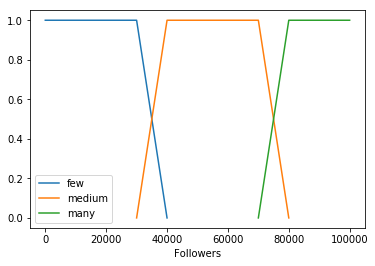

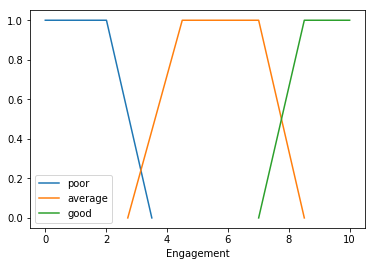

In [13]:
main()